In [ ]:
#!/usr/bin/python
'''
Programa de Especialización en Análisis de Datos con Python
Autor: Renzo Alberto Calle
'''

'\nPrograma de Especialización en Análisis de Datos con Python\nAutor: Renzo Alberto Calle\n'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

#Eliminar mensajes de Pandas Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Análisis Exploratorio

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Proyecto_DSRP/water_potability.csv')

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [ ]:
data.shape

(3276, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
#Numero de valores nulos por columna
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#Valores nulos en el dataset
data[data['ph'].isnull()]
data[data['Sulfate'].isnull()]
data[data['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


Comentarios:

*   Existen 1,998 muestras "No Potables" y 1,278 "Potables".
*   Existen 1,434 valores nulos, por lo que si eliminamos los registros con valores nulos se perderá una parte considerable de los datos.
*   Lo mejor es imputar estos valores nulos con la media o mediana.



In [ ]:
#Creamos una copia del dataset original 
data_test=data.copy()

In [ ]:
#Creamos una lista con las columnas que tienen valores faltantes
col_faltantes=['ph','Sulfate','Trihalomethanes']

In [ ]:
#Comparamos la media y la mediana de las columnas con valores nulos
for col in col_faltantes:
  mean=data_test[col].mean()
  mediana=data_test[col].median()
  print(f"{col}-> Media:{mean:.2f}, Mediana:{mediana:.2f}")

ph-> Media:7.08, Mediana:7.04
Sulfate-> Media:333.78, Mediana:333.07
Trihalomethanes-> Media:66.40, Mediana:66.62


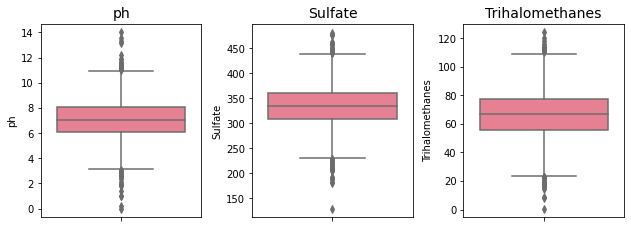

In [ ]:
#Gráfico de caja para las columnas con valores nulos
fig = plt.figure(figsize=(9, 9))
for ax,col in enumerate(col_faltantes):
  plt.subplot(3, 3, ax+1)
  plt.title(f"{col}",fontdict={'fontsize':14})
  sns.boxplot(y=col, data=data_test)

plt.tight_layout()

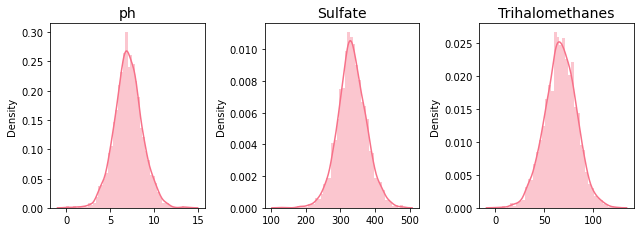

In [ ]:
#Visualizamos su distribución
fig = plt.figure(figsize=(9, 9))
for ax,col in enumerate(col_faltantes):
  plt.subplot(3, 3, ax+1)
  plt.title(f"{col}",fontdict={'fontsize':14})
  sns.distplot(x=data_test[col])
plt.tight_layout()
plt.show()

Interpretación:

*   La media y la mediana de las columnas con valores faltantes son muy cercanas, por lo cual ambas medidas tendrían una buena aproximación a la realidad. 
*   Las distribuciones de estas columnas con valores faltantes se ajustan a una distribución normal, por lo cual ambas medidas son una buena opción para imputar los datos faltantes.

In [ ]:
# Imputar valores faltantes con la mediana agrupando por Potability=0 y Potability=0
for col in col_faltantes:
  median_Potability_0=data_test.query('Potability == 0')[col].median()
  data_test.loc[data_test.query('Potability == 0')[col][data_test[col].isna()==True].index,col]=median_Potability_0

  median_Potability_1=data_test.query('Potability == 1')[col].median()
  data_test.loc[data_test.query('Potability == 1')[col][data_test[col].isna()==True].index,col]=median_Potability_1

data_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.035456,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.389426,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.389426,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,331.838167,392.449580,19.903225,66.678214,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,331.838167,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,331.838167,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
#Verificamos que ya no hay datos nulos
data_test.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#Verificamos que no hay datos duplicados
data_test.duplicated().sum()

0

# 2. Visualización de los datos

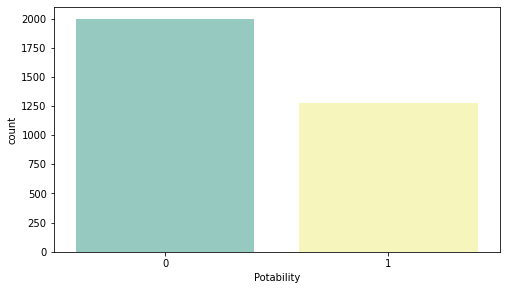

In [ ]:
#Countplot for Potability
plt.figure(figsize=(8,4.5))
sns.countplot(x=data_test["Potability"],data=data_test, palette="Set3")
plt.show()

In [ ]:
#Gráfico de pastel para Potability
data_pie = data.copy()

fig = plt.figure(figsize=(5,5))
data_pie.Potability =  data_pie.Potability.map({1:'Potable',0:'No Potable'})
px.pie(data_pie,names='Potability',title='Gráfico de pastel para la potabilidad', color_discrete_sequence=px.colors.qualitative.Set3)

<Figure size 360x360 with 0 Axes>

Interpretación: 

*   Existe cierto desequilibrio en los datos.
*   La etiqueta "No Potable" es la que tiene mayor cantidad de muestras.

### 9 variables explicativas: ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity



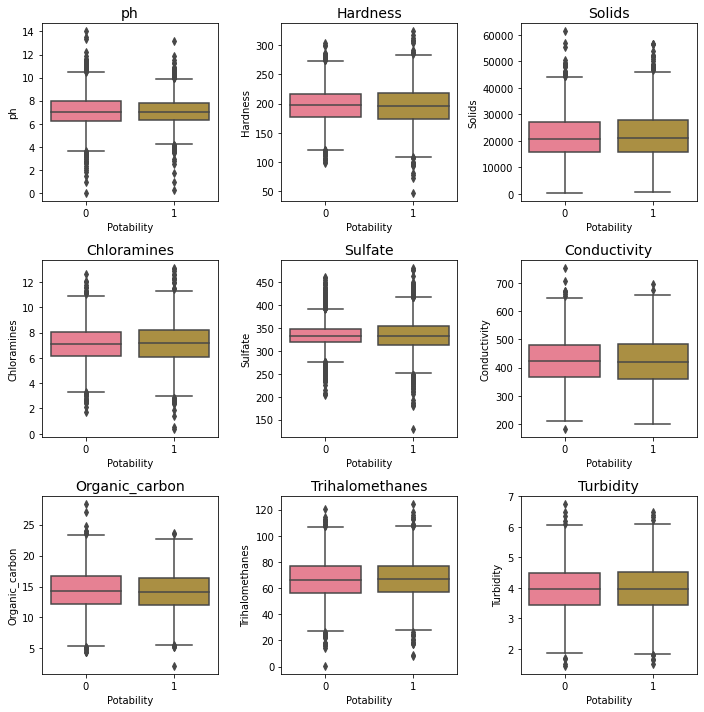

In [ ]:
#Boxplots de las variables agrupadas por potabilidad

fig = plt.figure(figsize=(10, 10))
for ax,col in enumerate(data_test.columns[:9]):
  plt.subplot(3, 3, ax+1)
  plt.title(f"{col}",fontdict={'fontsize':14})
  sns.boxplot(x="Potability", y=col, data=data_test)

plt.tight_layout()

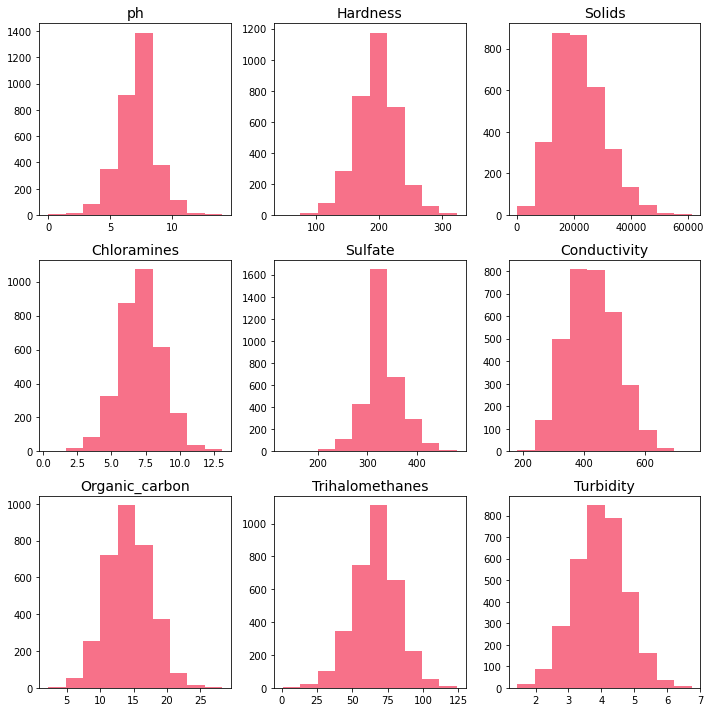

In [ ]:
#Histogramas de las variables 

fig = plt.figure(figsize=(10, 10))
for ax,col in enumerate(data_test.columns[:9]):
  plt.subplot(3, 3, ax+1)
  plt.title(f"{col}",fontdict={'fontsize':14})
  plt.hist(x=data_test[col])

plt.tight_layout()


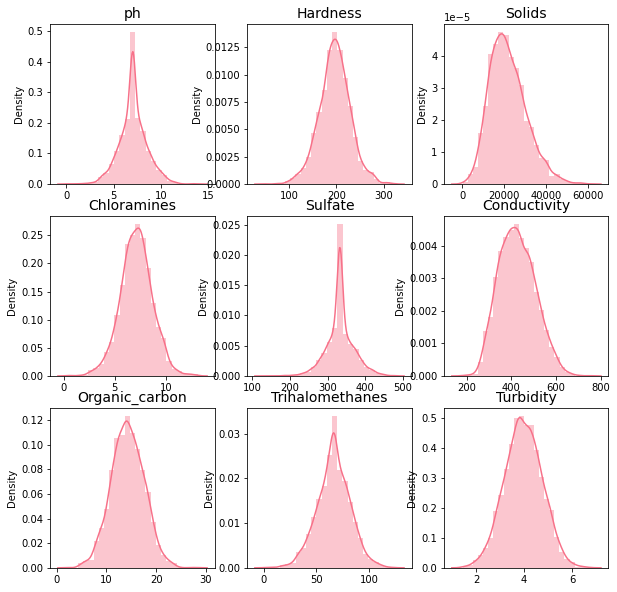

In [ ]:
#Distribución de las variables 

fig = plt.figure(figsize=(10, 10))
for ax,col in enumerate(data_test.columns[:9]):
  plt.subplot(3, 3, ax+1)
  plt.title(f"{col}",fontdict={'fontsize':14})
  sns.distplot(x=data_test[col], bins=25)
plt.show()

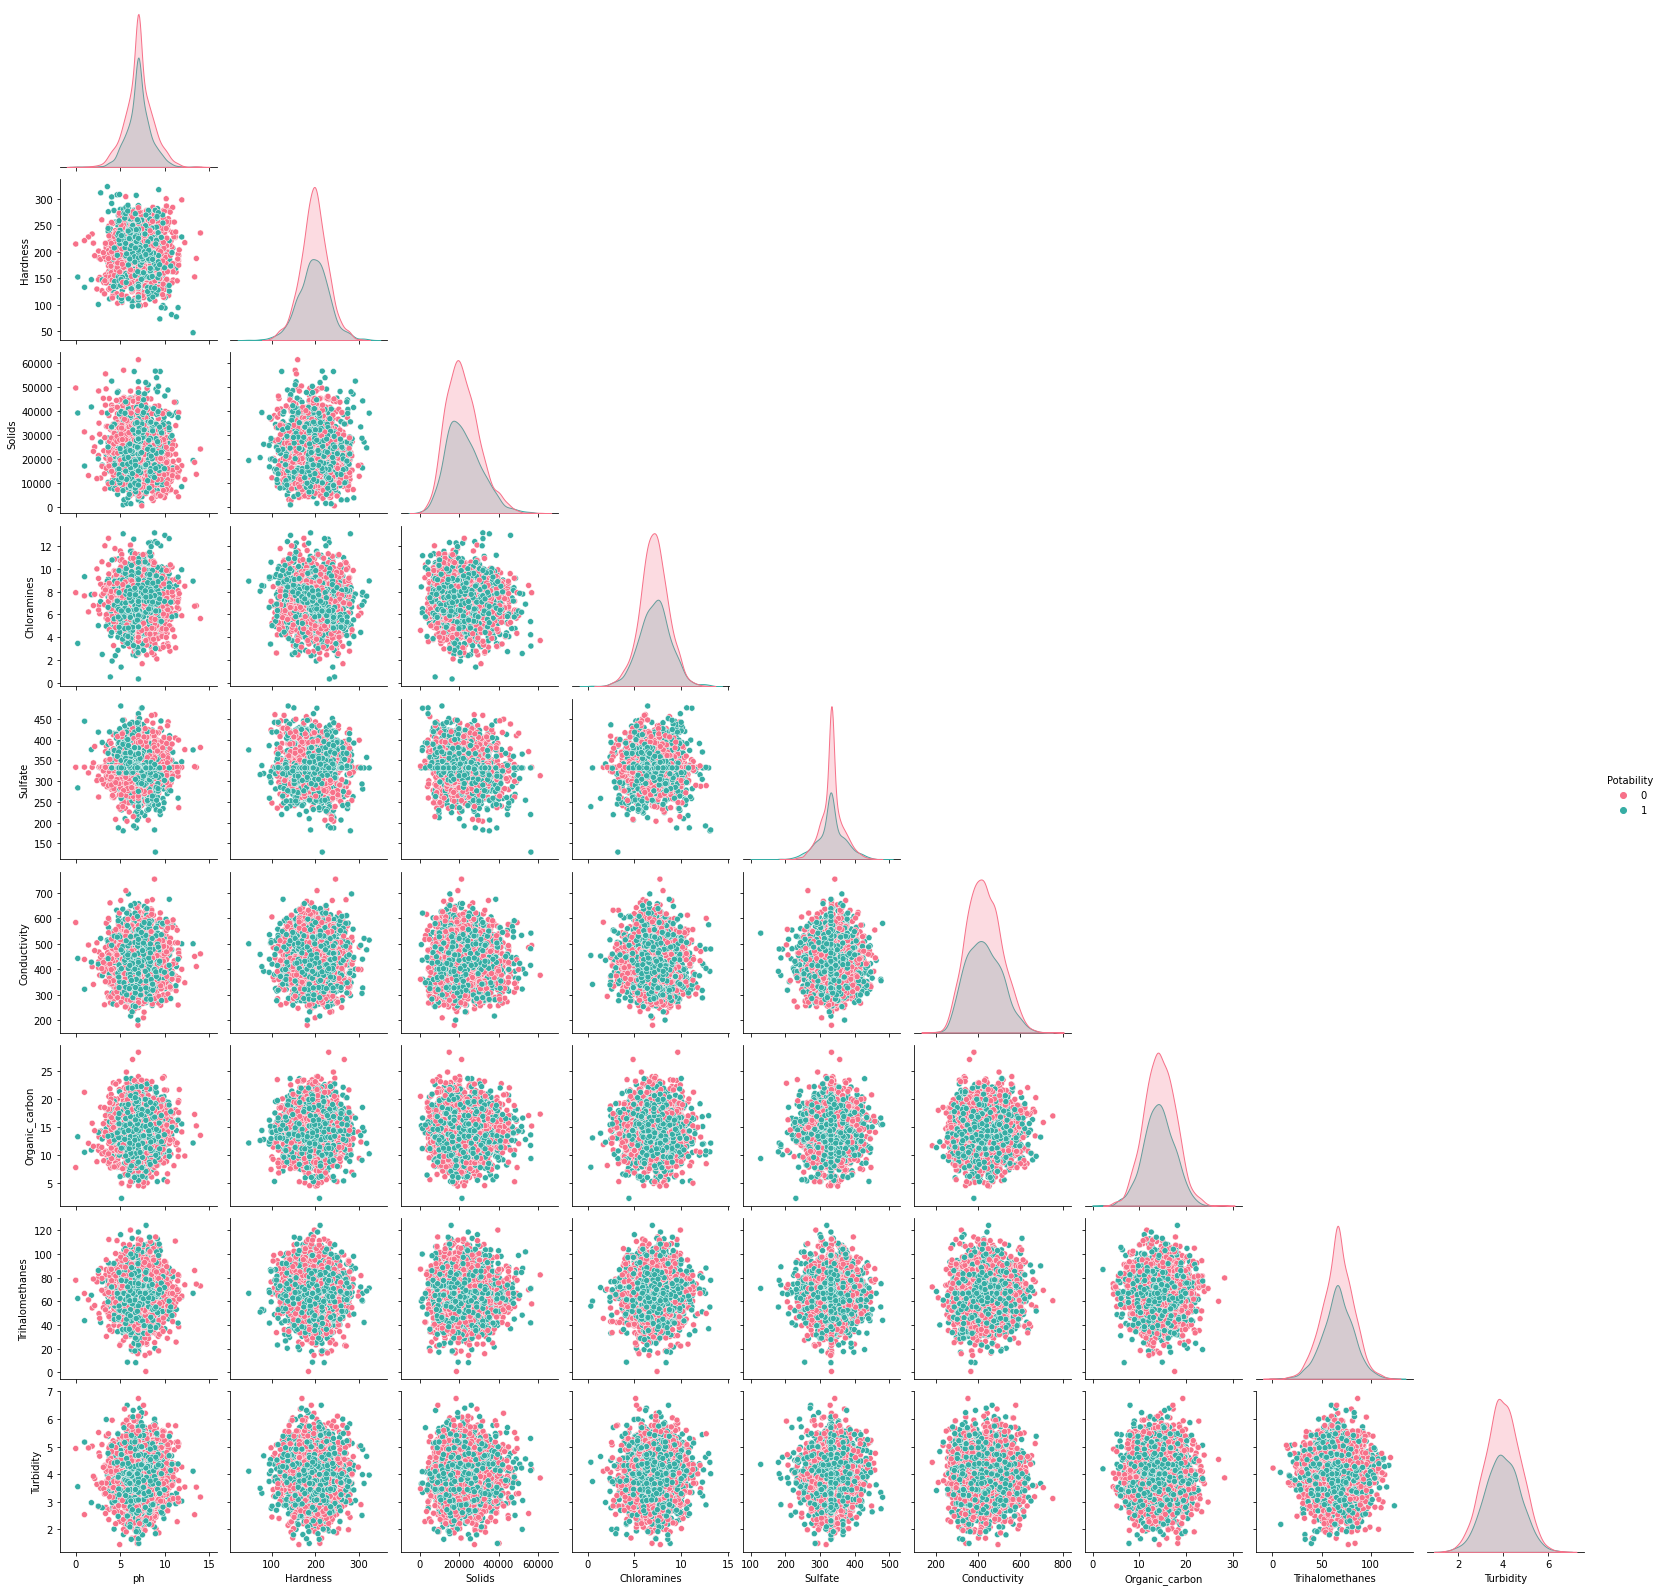

In [ ]:
#Gráfico de dispersión
sns.pairplot(data_test, hue="Potability", palette="husl", corner=True)
plt.show()

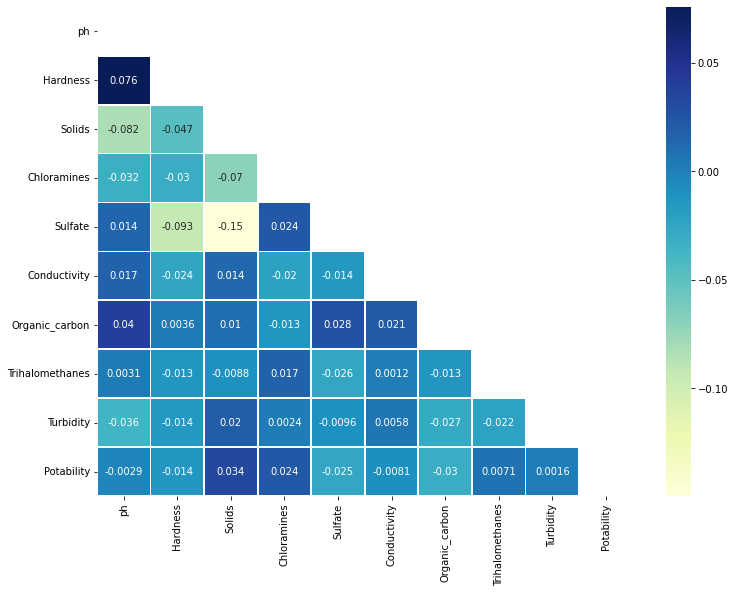

In [ ]:
#Gráfico de correlación
plt.figure(figsize=(12, 9))
matrix = np.triu(data_test.corr())
sns.heatmap(data_test.corr(), annot=True,linewidth=.8, mask=matrix, cmap="YlGnBu");

Interpretación: 

*   La distribución de las variables se ajusta a una distribución normal, lo cual nos indica que existe una gran homogeneidad en los datos.
*   Los sólidos disueltos parece ser la variable que más se corelaciona con la potabilidad del agua.
*   Existe una fuerte correlación entre el carbón orgánico y el pH.
*   Existe una considerable correlación entre la dureza y el pH.
*   Existe una considerable correlación negativa entre los sulfatos y los sólidos disueltos. 



# 3. Modelado

## Normalizar los datos 

In [ ]:
X = data_test[['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity']]

In [ ]:
y = data_test['Potability']

In [ ]:
#Separar conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#Normalizar los datos 
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

## Modelo 1: Regresión Logística

In [ ]:
#Definimos el Modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression
mod_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [ ]:
#Entrenamos el modelo 
mod_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [ ]:
#Analizando la predicción
y_pred = mod_lg.predict(X_test)

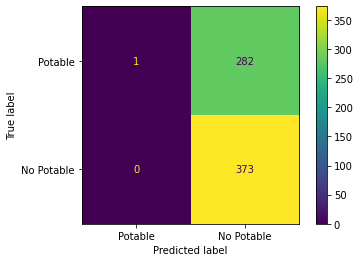

In [ ]:
#Matriz de Confusión
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test,y_pred,labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["Potable","No Potable"])
disp.plot()
plt.show()

In [ ]:
#Calculando la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5701219512195121


In [ ]:
#Calculando la precision del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
print('Precision del modelo:')
print(precision)

Precision del modelo:
1.0


In [ ]:
#Calculando la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test,y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0035335689045936395


In [ ]:
#Calculando el f1 del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
print('F1 del modelo:')
print(f1)

F1 del modelo:
0.007042253521126761


In [ ]:
#Reporte de Clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       373
           1       1.00      0.00      0.01       283

    accuracy                           0.57       656
   macro avg       0.78      0.50      0.37       656
weighted avg       0.76      0.57      0.42       656



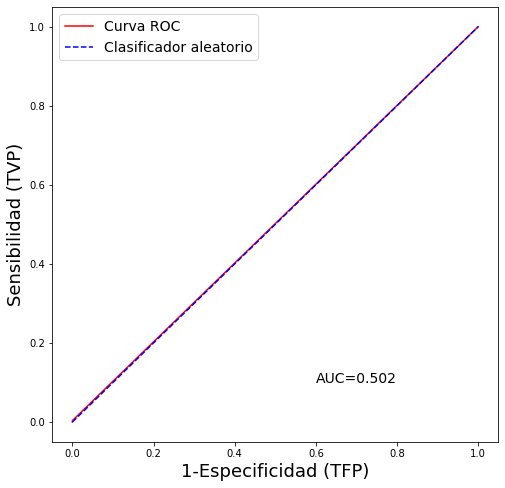

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
# Área bajo la curva ROC
auc = round(roc_auc_score(y_true=y_test, y_score=y_pred), 3)
# La figura
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Curva ROC', color='red')
puntos = np.linspace(0, 1, 3)
plt.plot(puntos, puntos, linestyle='dashed', label='Clasificador aleatorio',
         color='blue')
plt.legend(loc='best', fontsize=14)
plt.ylabel('Sensibilidad (TVP)', fontsize=18)
plt.xlabel('1-Especificidad (TFP)', fontsize=18)
plt.text(s="AUC="+str(auc), x=0.6, y=0.1, fontsize=14)
plt.show()


## Modelo 2: Máquinas de Soporte Vectorial (SVM)

In [ ]:
#Definimos el Modelo de Máquinas de Soporte Vectorial (SVM)
from sklearn.svm import SVC
svm = SVC()

In [ ]:
#Entrenamos el modelo 
svm.fit(X_train, y_train)

SVC()

In [ ]:
#Analizando la predicción
y_pred = svm.predict(X_test)

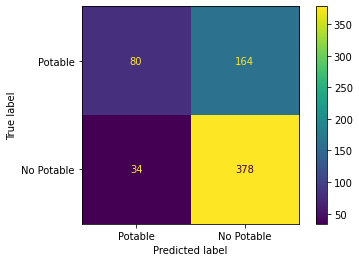

In [ ]:
#Matriz de Confusión
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test,y_pred,labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["Potable","No Potable"])
disp.plot()
plt.show()

In [ ]:
#Calculando la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.698170731707317


In [ ]:
#Calculando la precision del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.7017543859649122


In [ ]:
#Calculando la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test,y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.32786885245901637


In [ ]:
#Calculando el f1 del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
print('F1 del modelo:')
print(f1)

F1 del modelo:
0.44692737430167595


In [ ]:
#Reporte de Clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       412
           1       0.70      0.33      0.45       244

    accuracy                           0.70       656
   macro avg       0.70      0.62      0.62       656
weighted avg       0.70      0.70      0.66       656



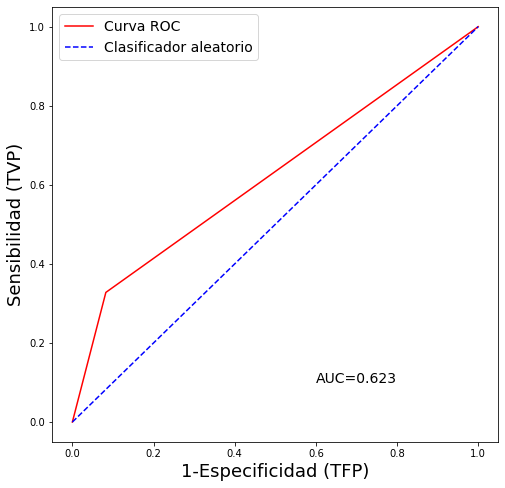

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
# Área bajo la curva ROC
auc = round(roc_auc_score(y_true=y_test, y_score=y_pred), 3)
# La figura
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Curva ROC', color='red')
puntos = np.linspace(0, 1, 3)
plt.plot(puntos, puntos, linestyle='dashed', label='Clasificador aleatorio',
         color='blue')
plt.legend(loc='best', fontsize=14)
plt.ylabel('Sensibilidad (TVP)', fontsize=18)
plt.xlabel('1-Especificidad (TFP)', fontsize=18)
plt.text(s="AUC="+str(auc), x=0.6, y=0.1, fontsize=14)
plt.show()


## Modelo 3: Árbol de decision

In [ ]:
#Definimos el Modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [ ]:
#Entrenamos el modelo 
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
#Analizando la predicción
y_pred = model_dt.predict(X_test)

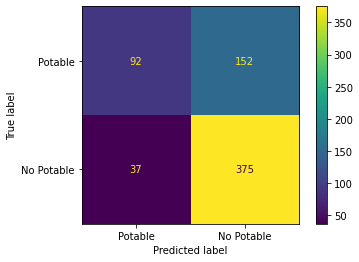

In [ ]:
#Matriz de Confusión
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test,y_pred,labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["Potable","No Potable"])
disp.plot()
plt.show()

In [ ]:
#Calculando la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.711890243902439


In [ ]:
#Calculando la precision del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.7131782945736435


In [ ]:
#Calculando la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test,y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.3770491803278688


In [ ]:
#Calculando el f1 del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
print('F1 del modelo:')
print(f1)

F1 del modelo:
0.4932975871313673


In [ ]:
#Reporte de Clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       412
           1       0.71      0.38      0.49       244

    accuracy                           0.71       656
   macro avg       0.71      0.64      0.65       656
weighted avg       0.71      0.71      0.69       656



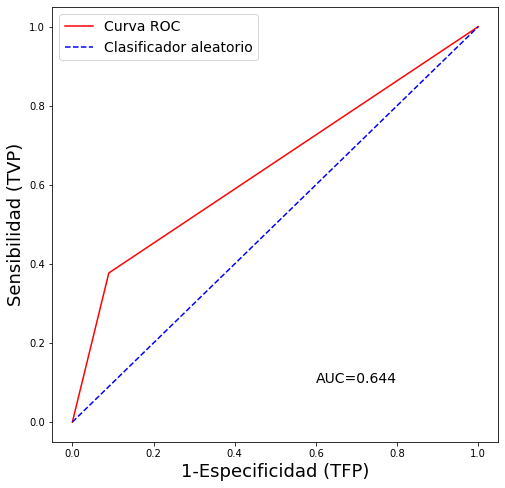

In [ ]:
# Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
# Área bajo la curva ROC
auc = round(roc_auc_score(y_true=y_test, y_score=y_pred), 3)
# La figura
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Curva ROC', color='red')
puntos = np.linspace(0, 1, 3)
plt.plot(puntos, puntos, linestyle='dashed', label='Clasificador aleatorio',
         color='blue')
plt.legend(loc='best', fontsize=14)
plt.ylabel('Sensibilidad (TVP)', fontsize=18)
plt.xlabel('1-Especificidad (TFP)', fontsize=18)
plt.text(s="AUC="+str(auc), x=0.6, y=0.1, fontsize=14)
plt.show()


## Modelo 4: Bosques Aleatorios

In [ ]:
#Definimos el Modelo de Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() 

In [ ]:
#Entrenamos el modelo 
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Analizando la predicción
y_pred = rfc.predict(X_test)

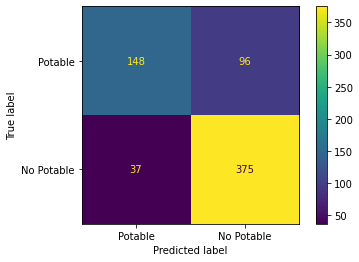

In [ ]:
#Matriz de Confusión
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test,y_pred,labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["Potable","No Potable"])
disp.plot()
plt.show()

In [ ]:
#Calculando la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7972560975609756


In [ ]:
#Calculando la precision del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.8


In [ ]:
#Calculando la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test,y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.6065573770491803


In [ ]:
#Calculando el f1 del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
print('F1 del modelo:')
print(f1)

F1 del modelo:
0.6899766899766899


In [ ]:
#Reporte de Clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       412
           1       0.80      0.61      0.69       244

    accuracy                           0.80       656
   macro avg       0.80      0.76      0.77       656
weighted avg       0.80      0.80      0.79       656



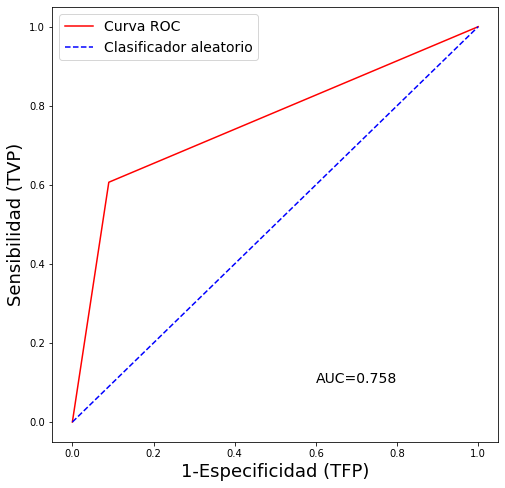

In [ ]:
# Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
# Área bajo la curva ROC
auc = round(roc_auc_score(y_true=y_test, y_score=y_pred), 3)
# La figura
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Curva ROC', color='red')
puntos = np.linspace(0, 1, 3)
plt.plot(puntos, puntos, linestyle='dashed', label='Clasificador aleatorio',
         color='blue')
plt.legend(loc='best', fontsize=14)
plt.ylabel('Sensibilidad (TVP)', fontsize=18)
plt.xlabel('1-Especificidad (TFP)', fontsize=18)
plt.text(s="AUC="+str(auc), x=0.6, y=0.1, fontsize=14)
plt.show()


## Ajuste de Hiperparámetros

In [ ]:
#Definimos el Modelo de Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10000, criterion='entropy', max_features='sqrt') 

In [ ]:
#Entrenamos el modelo 
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=10000)

In [ ]:
#Analizando la predicción
y_pred = rfc.predict(X_test)

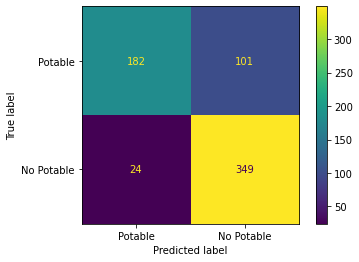

In [ ]:
#Matriz de Confusión
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test,y_pred,labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["Potable","No Potable"])
disp.plot()
plt.show()

In [ ]:
#Calculando la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test,y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.8094512195121951


In [ ]:
#Calculando la precision del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
print('Precision del modelo:')
print(precision)

Precision del modelo:
0.883495145631068


In [ ]:
#Calculando la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test,y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.6431095406360424


In [ ]:
#Calculando el f1 del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
print('F1 del modelo:')
print(f1)

F1 del modelo:
0.7443762781186094


In [ ]:
#Reporte de Clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       373
           1       0.88      0.64      0.74       283

    accuracy                           0.81       656
   macro avg       0.83      0.79      0.80       656
weighted avg       0.82      0.81      0.80       656



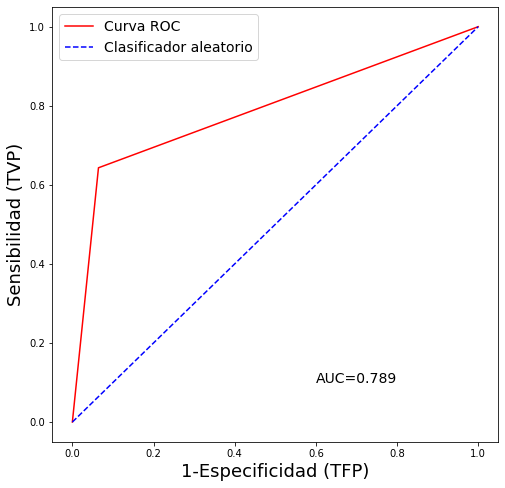

In [ ]:
# Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
# Área bajo la curva ROC
auc = round(roc_auc_score(y_true=y_test, y_score=y_pred), 3)
# La figura
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Curva ROC', color='red')
puntos = np.linspace(0, 1, 3)
plt.plot(puntos, puntos, linestyle='dashed', label='Clasificador aleatorio',
         color='blue')
plt.legend(loc='best', fontsize=14)
plt.ylabel('Sensibilidad (TVP)', fontsize=18)
plt.xlabel('1-Especificidad (TFP)', fontsize=18)
plt.text(s="AUC="+str(auc), x=0.6, y=0.1, fontsize=14)
plt.show()
